### 목표
- 버섯의 특징을 활용해서 독버섯/ 식용 분류 실습 진행해보자
- 특성의 중요도를 확인(중요한만큼 먼저 질문이 던져졌을거다)
- Decision Tree 학습 현황 시각화
- 과대적합 속성 제어

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split #훈련셋, 테스트셋 분리
from sklearn.tree import DecisionTreeClassifier #분류예측기(모델)

In [2]:
# 데이터 로딩
# 데이터 행개수, 열개수 크기 파악
# 결측치 파악
# 전처리, 문제와 답 분리
# 훈련셋과 테스트셋으로 분리
# 기술통계
# 모델링

데이터 불러오기

In [3]:
# 데이터 프레임화해서 불러오기
# csv 파일 읽기 : read_csv('경로 및 파일명')
# data > mushroom.csv
# 모든 컬럼 출력문: 판다스 옵션 설정
pd.set_option('display.max_columns',None) #모든 컬럼 출력해
data = pd.read_csv("data/mushroom.csv")
data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [4]:
# shape 크기 확인
# 크기부터 확인하는게 기분
data.shape

(8124, 23)

In [5]:
#데이터의 전체적인 정보
# info()
data.info()
# poisonous 정답 레이블 = 실제값
# cap-shape~ 문제 데이터 = 특성 = 특징 = 속성 = X
# 결측치의 여부 : 결측치 없음(non-null count)
# 특성 데이터 타입 : 문자열 (문자->숫자(인코딩))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

문제(특성)와 답(label) 분리

In [6]:
# feature : 정답 레이블을 제외한 모든 컬럼
# label : data 안에서 'poisonous'
X = data.iloc[:,1:] #문제
y = data.iloc[:,0] #답 label
# y= data['poisonous'] # data.loc[:,'poisonous']
print(X.shape) #문제크기 22개의 문제 특성(2차원)
print(y.shape) #답크기 1차원

(8124, 22)
(8124,)


In [7]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [8]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: poisonous, Length: 8124, dtype: object

In [9]:
# X의 데이터 타입? OBJ 문자열
# 기술통계함수
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
# 독버섯(p) 몇개, 식용(e) 몇개
y.value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

전처리
 - 범주->수치형(인코딩)
 - 원핫인코딩 : 값의 크고 작음의 의미가 없을때
 - 레이블인코딩

In [11]:
#위에서 다섯개의 행만 출력
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [12]:
# 원핫인코딩 함수
# pd.get_dummies()
# 컬럼 개수 22->117
X_oh = pd.get_dummies(X)
X_oh.shape

(8124, 117)

추가설명) 라벨인코딩예시
 - 서식지 컬럼 적용해보기

In [13]:
X['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [14]:
# 딕셔너리 숫자값을 맵핑
habitat_dic = {
    'u':2,
    'g':1,
    'm':3,
    'd':5,
    'p':4,
    'w':6,
    'l':7
}
X['habitat'].map(habitat_dic)

0       2
1       1
2       3
3       2
4       1
       ..
8119    7
8120    7
8121    7
8122    7
8123    7
Name: habitat, Length: 8124, dtype: int64

훈련셋과 테스트셋 분리
- train_test_split

In [15]:
# train_test_split : 1. 랜덤하게 섞어줌 2. 훈련, 테스트 데이터 분리(랜덤샘플링)
# 변수명의 순서도 정해짐 X_train, X_test, y_train, y_test
# 7:3
X_train, X_test, y_train, y_test = train_test_split(X_oh, y,
                                                    test_size=0.3,
                                                    random_state = 7)
print('훈련용 문제:', X_train.shape)
print('훈련용 답:', y_train.shape)
print('테스트용 문제:', X_test.shape)
print('테스트용 답:', y_test.shape)

훈련용 문제: (5686, 117)
훈련용 답: (5686,)
테스트용 문제: (2438, 117)
테스트용 답: (2438,)


In [16]:
# 모델 생성
tree = DecisionTreeClassifier()
# 규제가 적용 거의 안되어있음 -> 과대적합되도록 학습되게 설정됨

In [17]:
# 모델 학습
# fit()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
X_test.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
7492,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3675,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1863,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3571,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2254,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [19]:
# 모델 예측
pre = tree.predict(X_test)
pre

array(['p', 'p', 'e', ..., 'e', 'e', 'e'], dtype=object)

In [20]:
# 모델 평가
# 도구 불러와서 사용
# accuracy_score(예측값, 테스트용답)
from sklearn.metrics import accuracy_score
accuracy_score(pre,y_test) #100% 이모델이 성능이 일반화됐다고 생각할 수 있을까?

#또다른 테스트 데이터가 들어와도 100%정도 성능을 낼까? -> cross validation(교차검증)

1.0

In [21]:
# 참고 : 정확도 측정하는 함수(모델에)
tree.score(X_test,y_test)

1.0

#### 교차 검증
- 개념 : 모델의 일반화 성능을 측정(평가) -> 테스트 1번 실행하는 것보다, 여러개의 테스트 데이터를 사용하여 검증하는 것(신빙성)
- 방법 : 훈련세트와 테스트세트로 여러겹 나눠 평가
- 교차 검증은 학습하기 전에 정확도 어느정도 출력될지 확인하는 방법

In [22]:
from sklearn.model_selection import cross_val_score # 과대적합 X
result = cross_val_score(tree, X_train, y_train, cv=5) # 교차검증 5번 실행
print('교차검증 정확도 평균:', result.mean()) #99%
print('결과:', result) # 100%
# 5번 검증을 해도 비슷한 성능 내기 때문에 어느정도 신빙성이 있는 모델
# 일반화된 모델
# 모델 만드는게 쉽네? 실습 (좋은데이터)-> 프로젝트시에는 전처리, eda
# 과대 적합을 제어해야할까? X

교차검증 정확도 평균: 0.9998240985048372
결과: [1.         1.         1.         0.99912049 1.        ]


시각화 패키지 설치
anaconda prompt --> pip install graphviz
                --> conda install graphviz
C:\Users\smhrd\anaconda3\Library\bin 에서 graphviz 복사
C:\Users\smhrd\anaconda3\Lib\site-packages 에 graphviz 붙여넣기
https://graphviz.org/download/ 3.0.0 다운
시스템 환경 변수 편집 -> 환경 변수 -> 사용자변수

사용자 변수 path
C:\Users\smhrd\anaconda3\Library\bin
시스템 변수 path
C:\Users\smhrd\anaconda3\Lib\site-packages\graphviz

In [32]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot',
               class_names=['독','식용'],
               feature_names=X_oh.columns,
               impurity=False,
               filled=True)

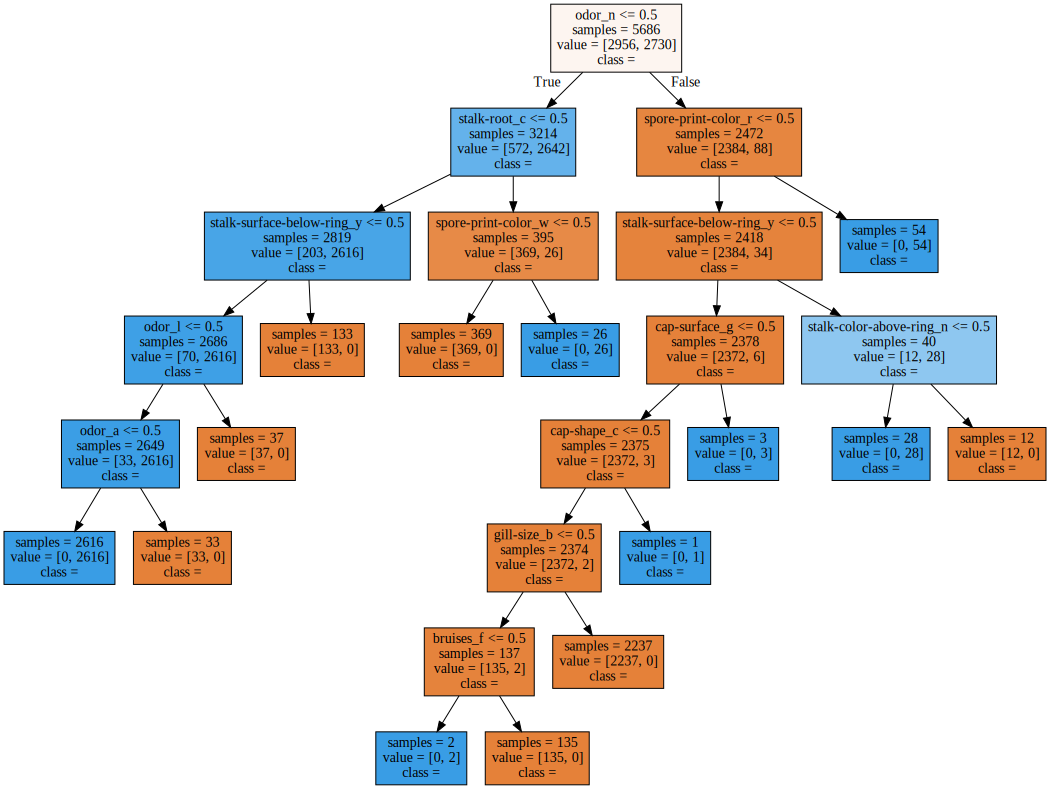

In [33]:
import graphviz

# 파이썬 파일 입출력
with open('tree.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

####  임의로 과대적합 제어해보기
- max_depth: 학습하는 깊이

In [31]:
tree2 = DecisionTreeClassifier(max_depth = 3)
tree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [34]:
from sklearn.tree import export_graphviz
export_graphviz(tree2, out_file='tree.dot',
               class_names=['독','식용'],
               feature_names=X_oh.columns,
               impurity=False,
               filled=True)

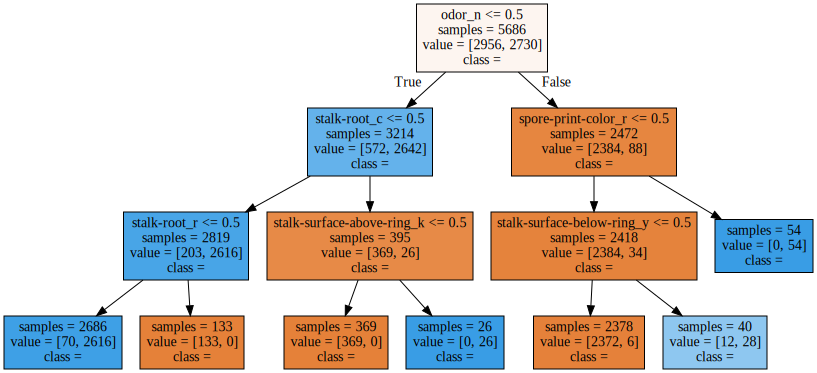

In [35]:
import graphviz

#파이썬 파일 입출력
with open('tree.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [26]:
# test 정확도 점수는?
tree2.score(X_test, y_test)

0.9868744872846595

In [27]:
# tree2의 교차검증
# 5번 교차 검증
r = cross_val_score(tree2, X_train, y_train, cv = 5)
print('결과 평균:', r.mean())
print('전체 결과:', r)

# 22개 -> 원핫 100개 이상
# 데이터 자체가 독버섯과 식용버섯을 잘 구분해낼 수 있는 데이터

결과 평균: 0.9839960553548712
전체 결과: [0.98242531 0.98680739 0.98504837 0.97977133 0.98592788]


In [28]:
# 실제 프젝에서 일반화 x
# 과대적합일 확률이 높은 모델은 어떻게 개선하나?
# 1. 데이터 측면: 다양성을 가지는 데이터, 클래스를 잘 구분할 수 있는 새로운 특성 추가
# 2. 모델측면 : 모델의 하이퍼 파라미터를 조정

#### 특성중요도
- 모델 자체적으로 중요한 특성을 선택하여 질문의 기준으로 삼음

In [29]:
fi = tree.feature_importances_
fi
#100개 이상의 특성에 대한 중요도 수치

array([0.00000000e+00, 7.03112501e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.10578942e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.38861859e-03, 0.00000000e+00, 2.29619887e-02, 0.00000000e+00,
       0.00000000e+00, 2.50743114e-02, 0.00000000e+00, 6.08901883e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.93849405e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.81454492e-01, 0.00000000e+00, 0.00000000e+00,
      

In [37]:
fi_df = pd.DataFrame(fi, index = X_oh.columns)

#중요도 높은 특성부터 출력
#정렬
#sort_values()
fi_df.sort_values(by=0, ascending=False) #내림차순(높은순부터)

,0
odor_n,0.608902
stalk-root_c,0.181454
stalk-surface-below-ring_y,0.098180
spore-print-color_r,0.036178
odor_l,0.025074
...,...
gill-color_g,0.000000
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_n,0.000000
